# Plot cutflows

In [9]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import pandas as pd
import matplotlib.pyplot as plt
from auxPlots import interpolateData, getContours
import seaborn as sns
import numpy as np
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.3)
cm = plt.colormaps['RdYlBu']

### Load ATLAS Recast Data

In [10]:
files = {'ATLAS-SUSY-2018-13' : '../results_dataFrames/cutflow_2018_13.pcl',
         'ATLAS-SUSY-2016-08' : '../results_dataFrames/cutflow_2016_08.pcl'}

recastDataDict = {label : pd.read_pickle(f) for label,f in files.items()}

### Get Model parameters

In [11]:
msb = 'mLLP'
mn1= 'mLSP'
tau = 'tau_ns'
recastData = list(recastDataDict.values())[0]
modelDict = {msb : recastData.iloc[0][msb], mn1 : recastData.iloc[0][mn1], tau : recastData.iloc[0][tau]}
title = r'$m_{\tilde b} = %1.0f$ GeV, $m_{\tilde \chi_1^0} = %1.0f$ GeV, $\tau = %1.2f$ ns'%(modelDict['mLLP'],modelDict['mLSP'],modelDict['tau_ns'])
figlabel = 'msb_%1.0f_mchi_%1.0f_tau_%1.2f'%(modelDict['mLLP'],modelDict['mLSP'],modelDict['tau_ns'])

### Plot cutflow for ATLAS analyses

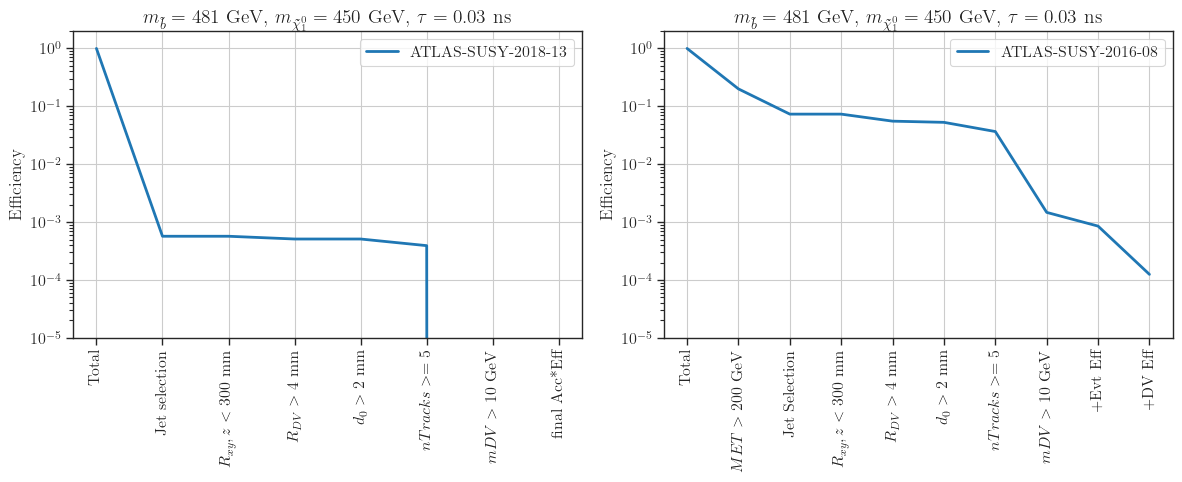

In [17]:
fig,axarr = plt.subplots(nrows=1,ncols=len(recastDataDict),figsize=(12,5))

allContours = {}
for iplot,label in enumerate(recastDataDict):
    ax = axarr[iplot]
    recastData = recastDataDict[label]    
    x_ticks = [r'%s'%c for c in recastData.columns]
    x_ticks = x_ticks[x_ticks.index('Total'):]
    x = np.arange(0.,len(x_ticks),1.)
    ax.set_xticks(x, x_ticks,rotation='vertical')
    y = recastData.iloc[0][x_ticks]
    yerr = [v[1] for v in y[:]]
    y = [v[0] for v in y[:]]
    p = ax.plot(x,y,label=label,linewidth=2)
    ax.set_yscale('log')
    ax.set_ylabel('Efficiency')
    ax.set_title(title,fontsize=14)
    ax.legend()
    ax.set_ylim(1e-5,2.)
    ax.set_yticks([1e-5,1e-4,1e-3,1e-2,1e-1,1.])
    ax.grid()
    

plt.tight_layout()
plt.savefig('cutflows_ATLAS_%s.png' %figlabel)
plt.show()

### Load CMS Recast Data

In [18]:
filesCMS = {'CMS-EXO-20-004' : '../results_dataFrames/cutflow_cms.pcl',
         'CMS-EXO-20-004 (Displaced Jet Veto)' : '../results_dataFrames/cutflow_cms_maxR_2.pcl'}

recastDataDictCMS = {label : pd.read_pickle(f) for label,f in filesCMS.items()}

### Plot Cutflow for CMS analyses

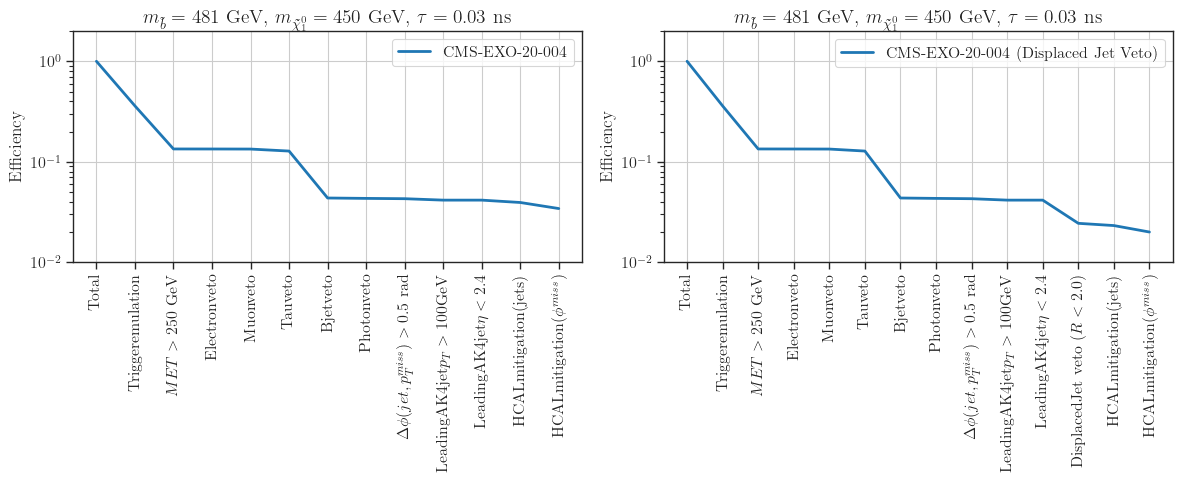

In [20]:
fig,axarr = plt.subplots(nrows=1,ncols=len(recastDataDictCMS),figsize=(12,5))

allContours = {}
for iplot,label in enumerate(recastDataDictCMS):
    ax = axarr[iplot]
    recastData = recastDataDictCMS[label]
    r = recastData.drop(columns='DisplacedJet veto ($R < -1.0$)',errors='ignore')
    x_ticks = [r'%s'%c for c in r.columns]
    x_ticks = x_ticks[x_ticks.index('Total'):]
    x = np.arange(0.,len(x_ticks),1.)
    ax.set_xticks(x, x_ticks,rotation='vertical')
    y = r.iloc[0][x_ticks]
    yerr = [v[1] for v in y[:]]
    y = [v[0] for v in y[:]]
    p = ax.plot(x,y,label=label,linewidth=2)
    ax.set_yscale('log')
    ax.set_ylabel('Efficiency')
    ax.set_title(title,fontsize=14)
    ax.legend()
    ax.set_ylim(1e-2,2.)
    ax.set_yticks([1e-2,1e-1,1.])
    ax.grid()
    

plt.tight_layout()
plt.savefig('cutflows_CMS_%s.png' %figlabel)
plt.show()